# Implementations
- Scipy find_peaks_cwt: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html
- Scipy find_peaks: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks
- sensor-motion: https://github.com/sho-87/sensormotion/blob/master/sensormotion/peak.py#L19

# For real-time analysis
- Is crutial to select a lookback window
- The parameters: distance and height of the signal are really important to the performance of the algorithm

# Script with Python lib

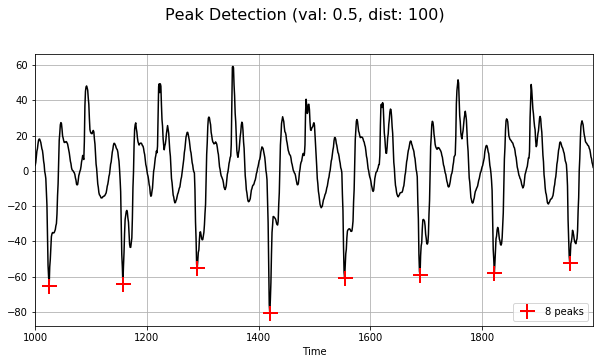

Peaks:  8


In [7]:
import sensormotion as sm
import pandas as pd
import matplotlib.pyplot as plt

folder_path = "~/Input_signal/"
data = pd.read_csv(folder_path + 's01_gait_1_fp.csv')
peak_times, peak_values = sm.peak.find_peaks(time=data.index[1000:2000], signal=data['5'][1000:2000],
                                             peak_type='valley',
                                             min_val=0.5, min_dist=100,
                                             plot=True)
print("Peaks: ", len(peak_times))

# Raw script

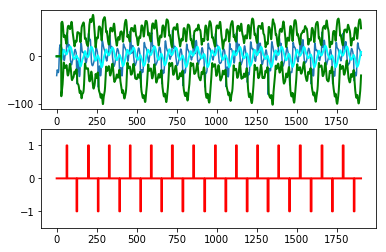

In [11]:
# Implementation of algorithm from https://stackoverflow.com/a/22640362/6029703
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

# Data
y = data['5'][100:2000].values

# Settings: lag = 30, threshold = 5, influence = 0
lag = 30
threshold = 3
influence = 0.3

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)

# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"], color="cyan", lw=2)

# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [ ]:
# 